# Crop classifier

### Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.shape

(2200, 8)

In [4]:
df.describe()[1:]

,N,P,K,temperature,humidity,ph,rainfall
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


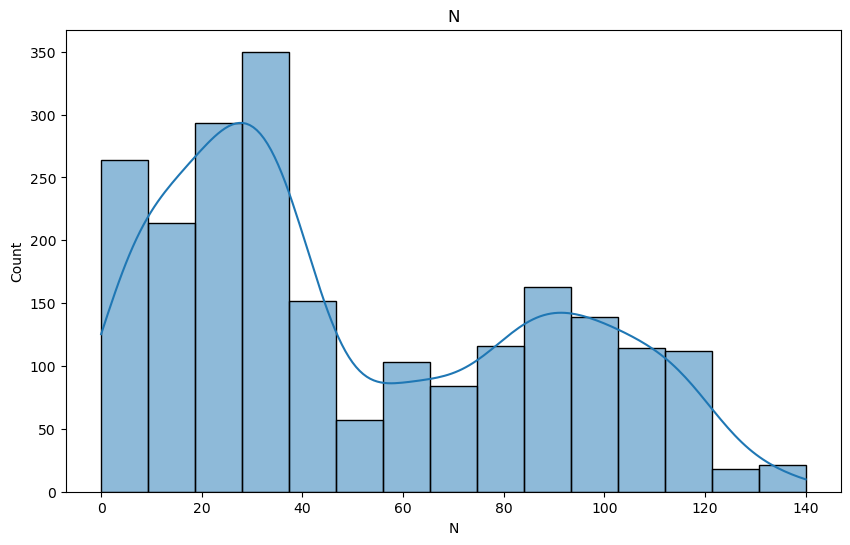

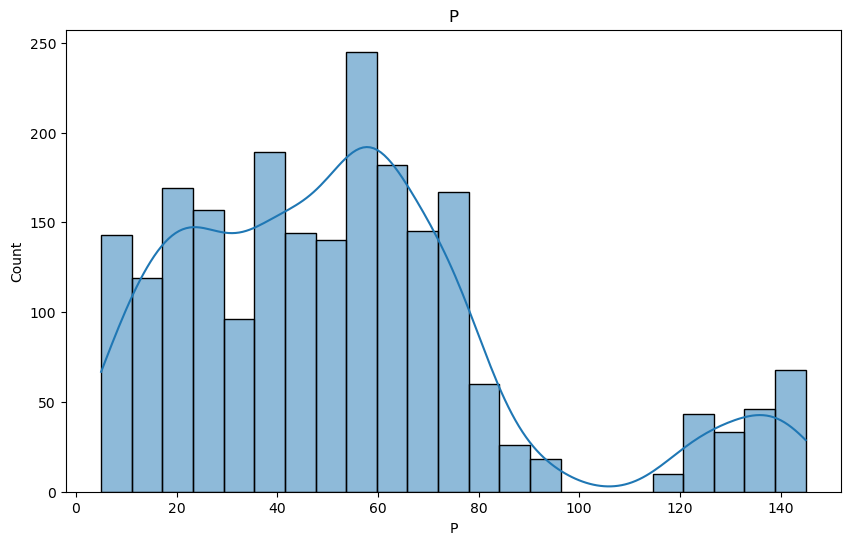

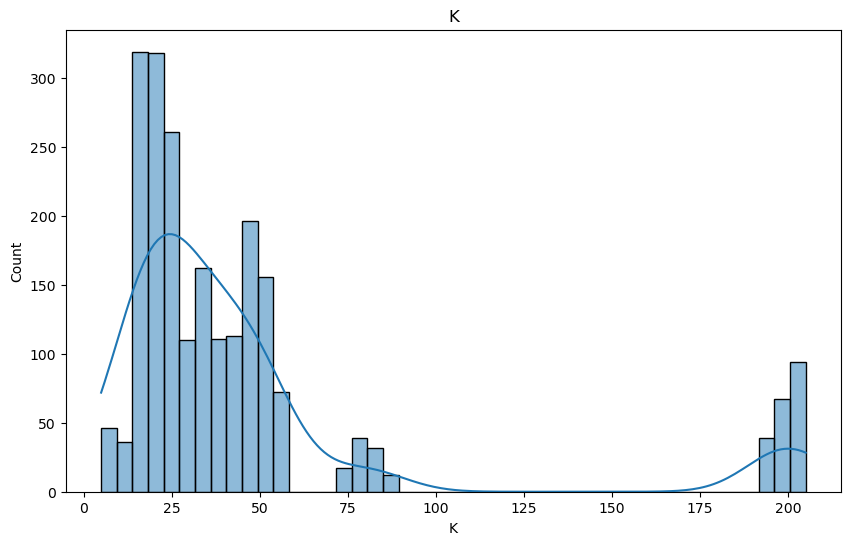

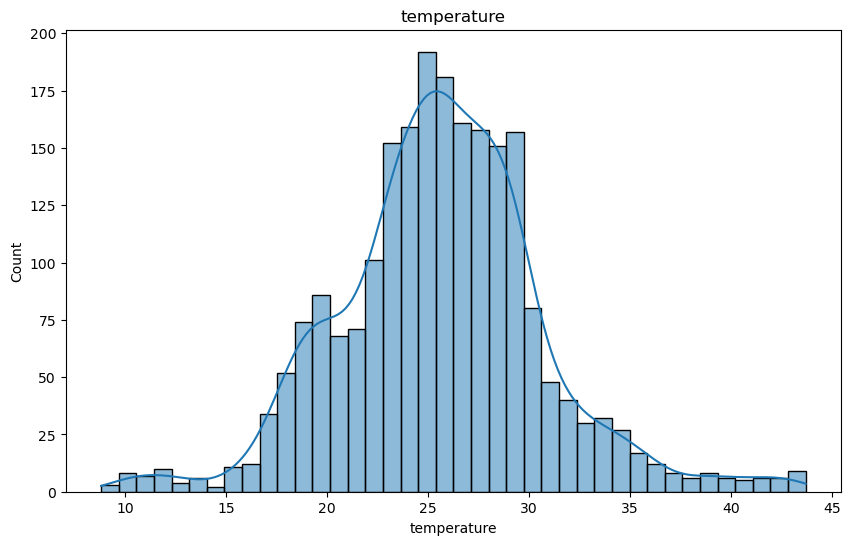

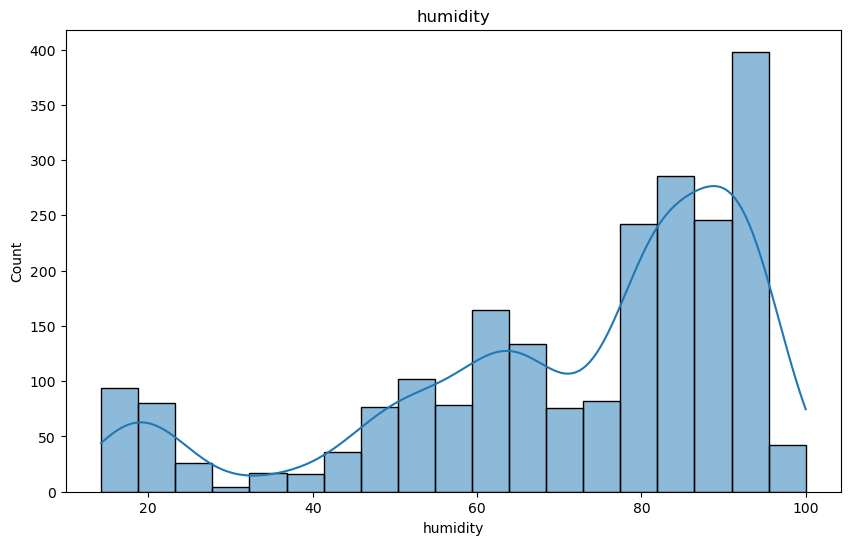

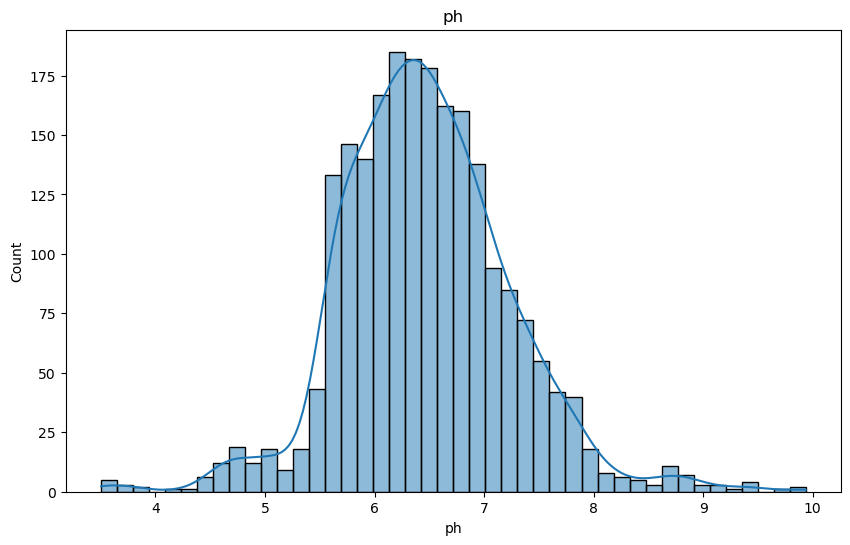

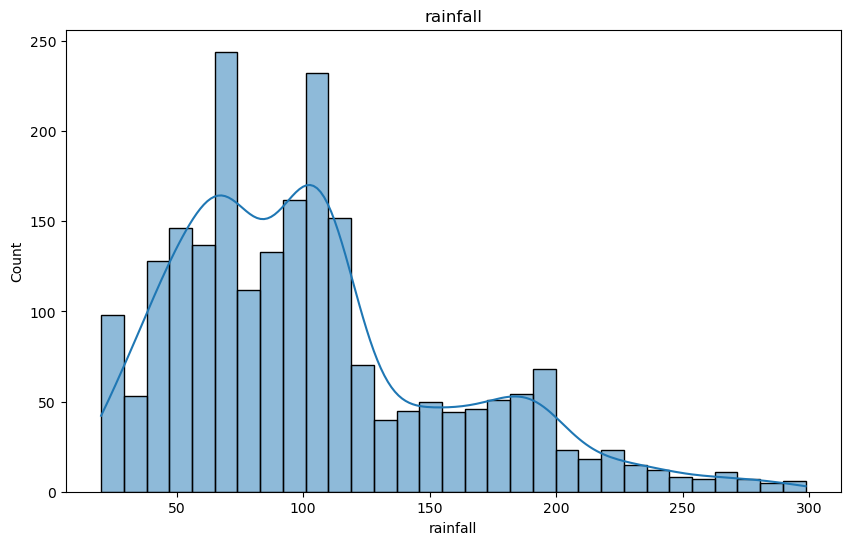

In [5]:
features = df.columns[:-1]
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.title(feature)
    sns.histplot(df, x=feature, kde=True)
    plt.show()

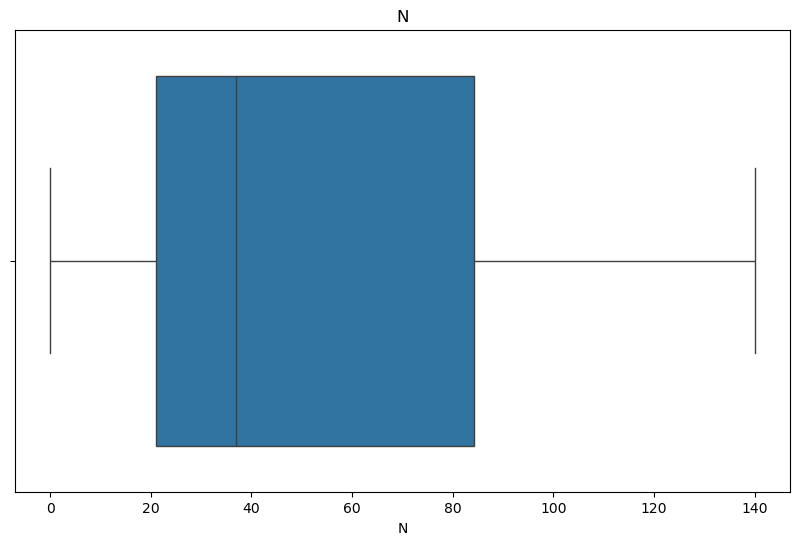

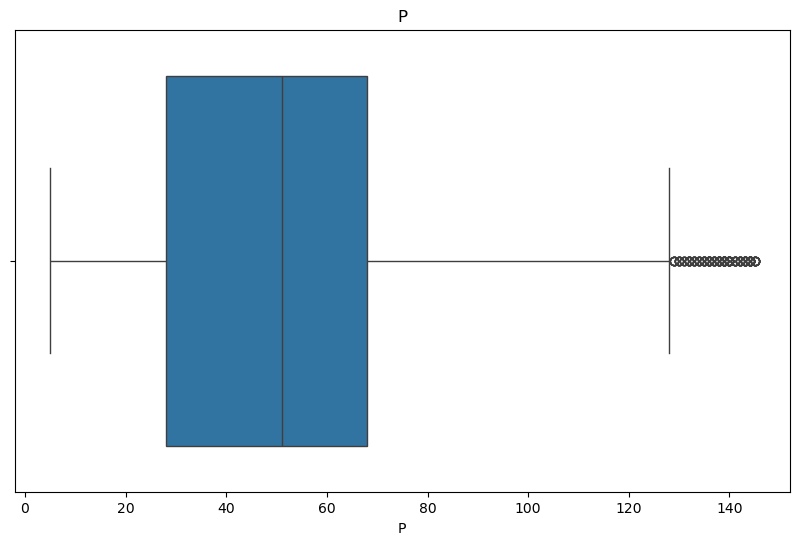

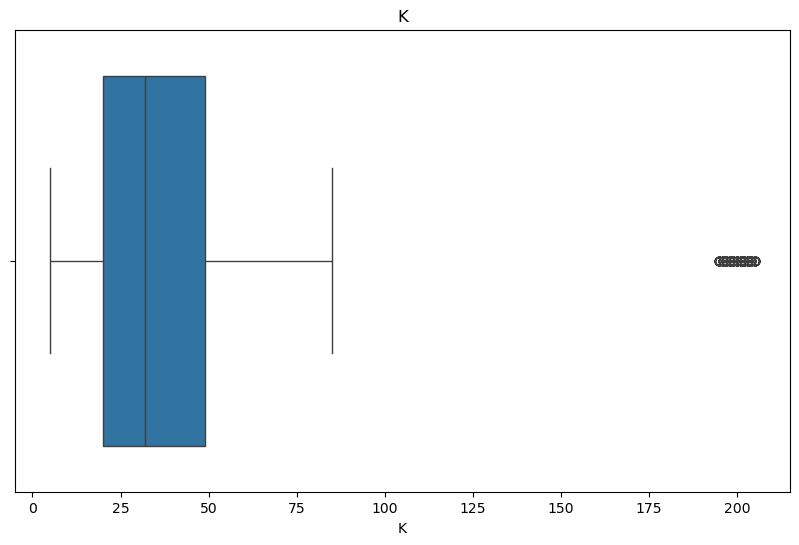

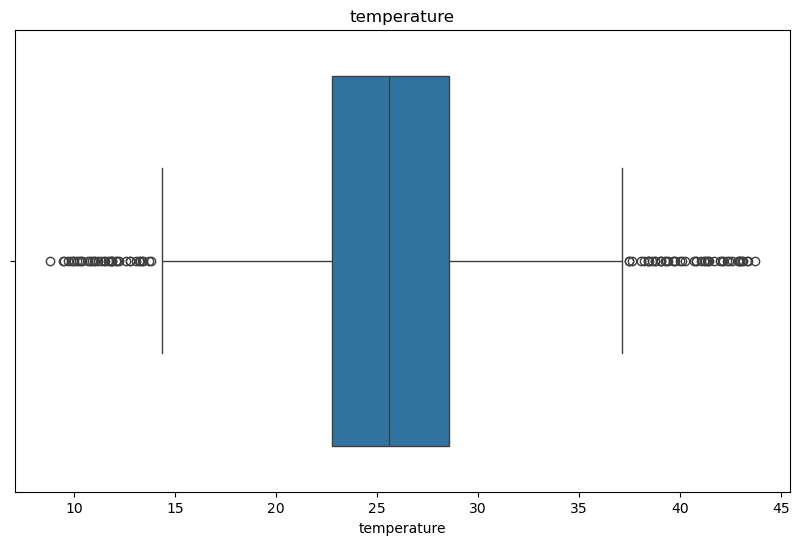

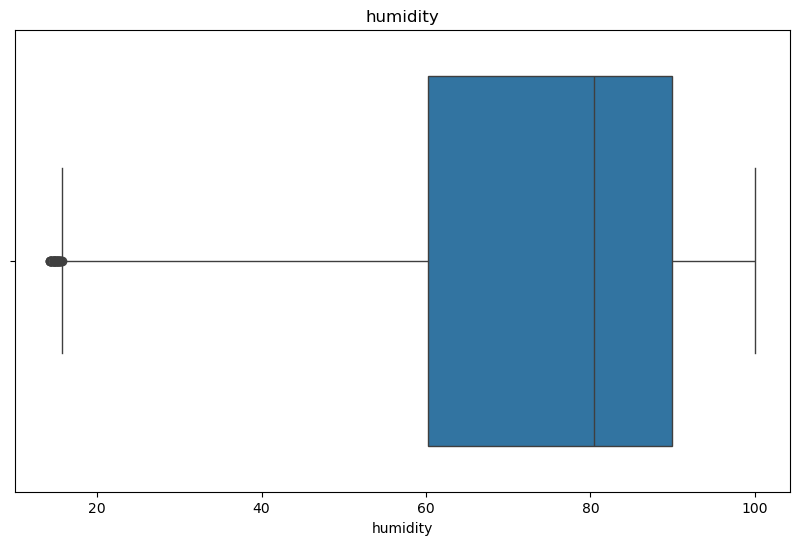

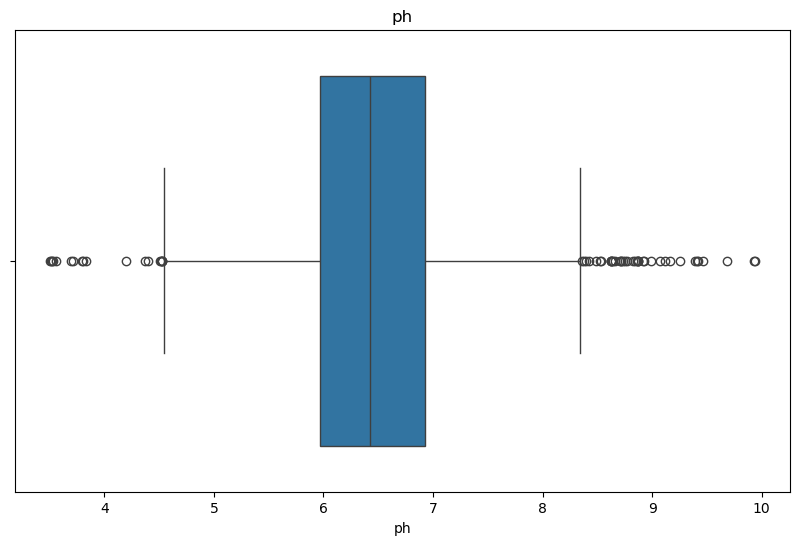

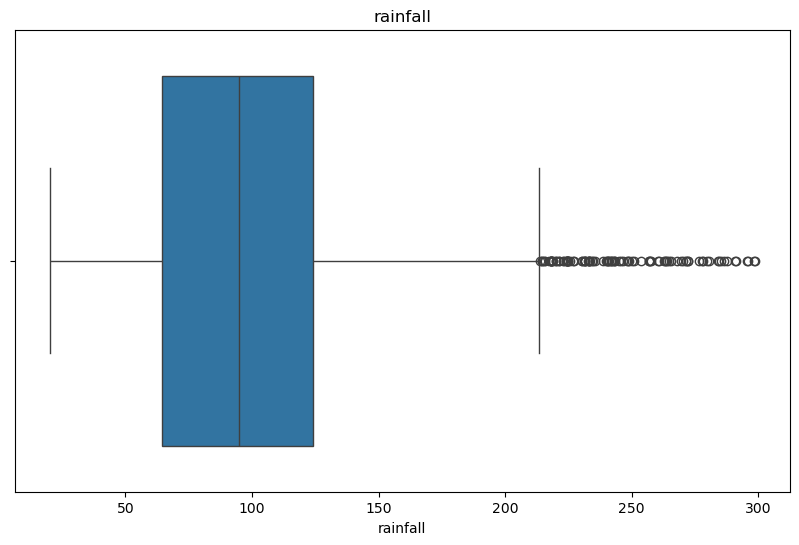

In [6]:
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.title(feature)
    sns.boxplot(df, x=feature)
    plt.show()

### Outlier elimination

In [7]:
def outliers_elimination(feature: str, df: pd.DataFrame) -> pd.DataFrame:
    first_quantile = df[feature].quantile(0.25)
    third_quantile = df[feature].quantile(0.75)
    IQR = third_quantile - first_quantile

    lower_limit = first_quantile - 1.5 * IQR
    upper_limit = third_quantile + 1.5 * IQR

    df = df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]
    return df

In [8]:
for feature in features:
    df = outliers_elimination(feature, df)

In [9]:
df.shape

(1846, 8)

In [10]:
df.to_csv("crop_recommendation_outlierless.csv")